# Optimisation problems:


They consist of an objective function and constraints, e.g., we may want to minimise a function that depends on several variables:


$\min f(x_1, x_2, x_3, x_4, ...)$, 


given a set of constraints for $x_1, x_2, x_3, x_4, ...$, e.g. we may want to minimise the function where these variables are related by equalities or inequalities.

In problem optimisations, we need to provide guesses for each variable.


## Optimisation with scipy

- scipy is a library that works with numpy arrays.

- It contains routines for:

    - Linear algebra
    - Numerical Integration
    - Ordinary differential equations
    - Signal processing
    - **Optimisation**

The scipy optimisation library allows us to:

- carry out minimisation of multivariate functions using several algorithms (e.g. least-squares optimisation, curve fitting, among others).

- find roots and solve systems of equations.

## 1. Example:

Find the minimum of the surface $f(x,y) = (x^2 + y)$, i.e., 


$\min f(x,y)$, given the following constraints:

$x^3 + xy = 100$

$x^2 + y \geq 50$

$-100 \leq x, y \leq 100$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as opt

### Objective function:

$f(x,y) = (x^2 + y)$

In [2]:
def obj_function(input):
    """
    Function that returns the surface to be minimised.
    """
    
    x = input[0]
    y = input[1]
    
    return (x**2 + y)

### Plot:

In [3]:
# Vectors with coordinates

x = np.arange(-100, 100, 0.1)
y = np.arange(-100, 100, 0.1)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Call the surface function
Z = obj_function((X, Y))

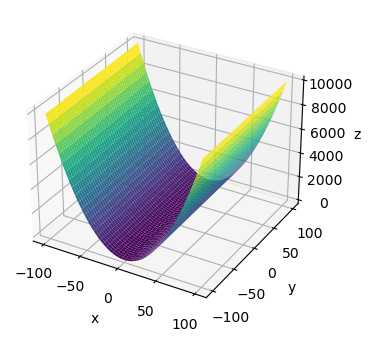

In [4]:
# Now we do some plotting:
fig = plt.figure(figsize=(5,4))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis') # Creates 'n=100' contours at different Z to make the surface

#ax.plot(x, 50 -x**2)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Constraint 1:

$x^3 + xy - 100 = 0$

In [5]:
def constraint1(input):
    x = input[0]
    y = input[1]    
    return (x**3 + x*y - 100)

### Constraint 2:

$x^2 + y - 50 \geq 0$

In [6]:
def constraint2(input):
    x = input[0]
    y = input[1]
    return (x**2 + y - 50)

### Constraint dictionary and list


In [7]:
constraint_1 = {'type': "eq", 'fun': constraint1}

constraint_2 = {'type': "ineq", 'fun': constraint2}

constraint_list = [constraint_1, constraint_2]

print(type(constraint_1), type(constraint_2))

<class 'dict'> <class 'dict'>


### Bounds:

In [9]:
# Tuples for the limits:

bound_x = (-100, 100)
bound_y = (-100, 100)

In [10]:
# Create list:

bounds_xy = [bound_x, bound_y]

print(bounds_xy)

print(type(bounds_xy))

[(-100, 100), (-100, 100)]
<class 'list'>


### Guess initial values for x and y:

In [11]:
x0= [1, 1]

### Minimisation function:

In [12]:
# This is our target

result = opt.minimize(obj_function, x0, method = "SLSQP",\
                      bounds = bounds_xy,\
                      constraints = constraint_list)


In [13]:
print(result)

     fun: 50.00000014613459
     jac: array([3.99999958, 1.        ])
 message: 'Optimization terminated successfully'
    nfev: 23
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 2.        , 46.00000016])


In [14]:
print(result.x)

[ 2.         46.00000016]


## 2. Example:

Find the minimum of the surface $f(x,y,z,w) = xw\,(x+y+z) + w$, i.e., 


$\min f(x,y,z,w)$, given the following constraints:

$xyzw \geq 25$

$x^2 + y^2 + z^2 + w^2 = 40$

$1 \leq x, y, z, w \leq 5$

### Objective function:

$f(x,y,z,w) = xw\,(x+y+z) + w$

In [15]:
def obj_function2(input):
    x = input[0]
    y = input[1]
    z = input[2]
    w = input[3]
    return (x*w*(x + y + z) + w)

### Constraint 1:

$xyzw \geq 25$

In [16]:
def constraint1(input):
    x = input[0]
    x = input[0]
    y = input[1]
    z = input[2]
    w = input[3]  
    return (x*y*z*w - 25)

### Constraint 2:

$x^2 + y^2 + z^2 + w^2 = 40$

In [17]:
def constraint2(input):
    x = input[0]
    y = input[1]
    z = input[2]
    w = input[3]
    return (x**2 + y**2 + z**2 + w**2 - 40)

### Constraint dictionaries and list

In [18]:
# Creating a dictionary:

constraint_1 = {'type': 'ineq', 'fun': constraint1}

# Creating a dictionary:

constraint_2 = {'type': 'eq', 'fun': constraint2}

In [19]:
constraint_list2 = [constraint_1, constraint_2]

### Bounds:

$1 \leq x, y, z, w \leq 5$

In [20]:
# Tuples for the limits:

bound_x = (1, 5)
bound_y = (1, 5)
bound_z = (1, 5)
bound_w = (1, 5)

In [21]:
# Create list:

bounds_xyzw = [bound_x, bound_y, bound_z, bound_w]

print(bounds_xyzw)

[(1, 5), (1, 5), (1, 5), (1, 5)]


In [22]:
### Guess initial values for x and y:

x0_2= [2, 3, 2, 2]

### Minimisation function:

In [23]:
result2 = opt.minimize(obj_function2, x0_2, \
                       method = "SLSQP", \
                       bounds = bounds_xyzw, \
                       constraints = constraint_list2)


In [24]:
print(result2)

     fun: 14.268511484964504
     jac: array([13.44462752,  1.34087014,  1.34087014, 11.44870889])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.07588185, 4.31794043, 4.31794027, 1.24629873])


In [25]:
print(result2.x)

[1.07588185 4.31794043 4.31794027 1.24629873]
